# Github Bug Issue Analysis

In [9]:
import pandas as pd

## Data Loading

In [10]:
data = pd.read_json('/Users/nicholasgunawan/Library/CloudStorage/OneDrive-peter.petra.ac.id/KULIAH/SKRIPSI/code/Data/Data From API/Kind:Bug/github_bug_issues.json')

## Initial Data Exploration

In [11]:
data.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'sub_issues_summary', 'active_lock_reason', 'body', 'closed_by',
       'reactions', 'timeline_url', 'performed_via_github_app',
       'state_reason'],
      dtype='object')

In [12]:
data.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,sub_issues_summary,active_lock_reason,body,closed_by,reactions,timeline_url,performed_via_github_app,state_reason
0,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://github.com/kubernetes/kubernetes/issue...,2640548333,I_kwDOAToIks6dY5Ht,128654,kubelet evented panic when use generic pleg re...,...,2025-02-26 18:51:28+00:00,NONE,"{'total': 0, 'completed': 0, 'percent_complete...",None,### What happened?\r\n\r\nkubelet evented pani...,"{'login': 'k8s-ci-robot', 'id': 20407524, 'nod...",{'url': 'https://api.github.com/repos/kubernet...,https://api.github.com/repos/kubernetes/kubern...,NaN,completed
1,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://github.com/kubernetes/kubernetes/issue...,2639668210,I_kwDOAToIks6dViPy,128638,kubelet crash: fatal error: concurrent map writes,...,2024-11-07 19:45:22+00:00,CONTRIBUTOR,"{'total': 0, 'completed': 0, 'percent_complete...",None,### What happened?\n\nWhile looking into three...,"{'login': 'k8s-ci-robot', 'id': 20407524, 'nod...",{'url': 'https://api.github.com/repos/kubernet...,https://api.github.com/repos/kubernetes/kubern...,NaN,completed
2,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://github.com/kubernetes/kubernetes/issue...,2637957988,I_kwDOAToIks6dPAtk,128609,K8S <= 1.27.x apt gpg key expired,...,2024-11-06 20:25:08+00:00,NONE,"{'total': 0, 'completed': 0, 'percent_complete...",None,### What happened?\n\nK8S <= 1.27.x apt gpg ke...,"{'login': 'k8s-ci-robot', 'id': 20407524, 'nod...",{'url': 'https://api.github.com/repos/kubernet...,https://api.github.com/repos/kubernetes/kubern...,NaN,completed
3,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://github.com/kubernetes/kubernetes/issue...,2636949747,I_kwDOAToIks6dLKjz,128594,kubectl get cs only show one etcd,...,2024-11-07 02:18:22+00:00,NONE,"{'total': 0, 'completed': 0, 'percent_complete...",None,### What happened?\n\n\r\n```shell\r\nkubectl ...,"{'login': 'NatureLR', 'id': 30221928, 'node_id...",{'url': 'https://api.github.com/repos/kubernet...,https://api.github.com/repos/kubernetes/kubern...,NaN,completed
4,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://api.github.com/repos/kubernetes/kubern...,https://github.com/kubernetes/kubernetes/issue...,2636492410,I_kwDOAToIks6dJa56,128588,KCM crash when running e2e test LoadBalancers ...,...,2024-11-06 00:26:52+00:00,NONE,"{'total': 0, 'completed': 0, 'percent_complete...",None,### What happened?\n\nWhen running e2e test on...,"{'login': 'k8s-ci-robot', 'id': 20407524, 'nod...",{'url': 'https://api.github.com/repos/kubernet...,https://api.github.com/repos/kubernetes/kubern...,NaN,completed


## Area Label Analysis

In [13]:
# Function to check if a record has area labels
def has_area_label(labels):
    """Check if any label in the labels list starts with 'area/'"""
    if isinstance(labels, list):
        for label in labels:
            if isinstance(label, dict) and 'name' in label:
                if label['name'].startswith('area/'):
                    return True
            elif isinstance(label, str) and label.startswith('area/'):
                return True
    return False

# Count records with area labels
records_with_area = data[data['labels'].apply(has_area_label)]
count_with_area = len(records_with_area)

print(f"Total number of records: {len(data)}")
print(f"Records with area labels: {count_with_area}")
print(f"Percentage with area labels: {(count_with_area/len(data)*100):.2f}%")

Total number of records: 13932
Records with area labels: 2354
Percentage with area labels: 16.90%


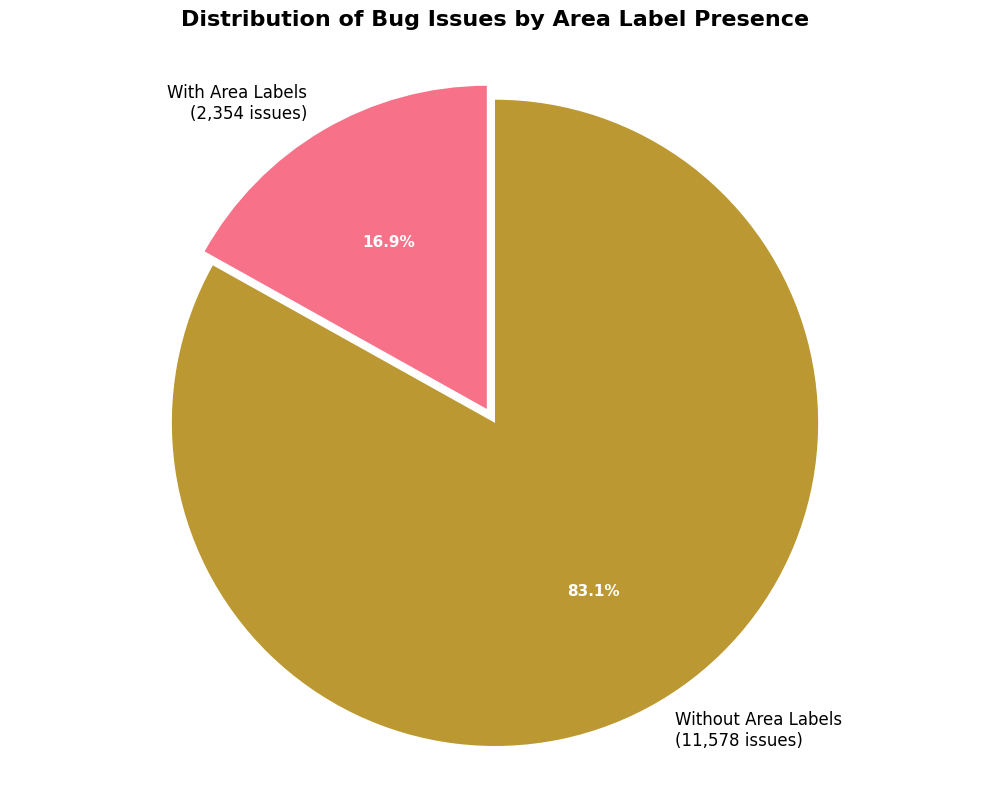

In [29]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = ['With Area Labels', 'Without Area Labels']
sizes = [count_with_area, len(data) - count_with_area]
percentages = [(count_with_area/len(data)*100), ((len(data) - count_with_area)/len(data)*100)]
explode = (0.05, 0)  # explode the first slice slightly

# Create pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   explode=explode, startangle=90)

# Enhance the appearance
plt.title('Distribution of Bug Issues by Area Label Presence', fontsize=16, fontweight='bold', pad=20)

# Add count information to the labels
for i, (label, size, percentage) in enumerate(zip(labels, sizes, percentages)):
    texts[i].set_text(f'{label}\n({size:,} issues)')
    texts[i].set_fontsize(12)

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


## Identifying Unique Area Labels

In [15]:
all_area_labels = set()
for index, row in data.iterrows():
    labels = row['labels']
    if isinstance(labels, list):
        for label in labels:
            if isinstance(label, dict) and 'name' in label:
                label_name = label['name']
                if label_name.startswith('area/'):
                    all_area_labels.add(label_name)
            elif isinstance(label, str) and label.startswith('area/'):
                all_area_labels.add(label)

print(f"Number of unique area labels: {len(all_area_labels)}")
print("\nAll area labels found:")
for label in sorted(all_area_labels):
    print(f"  - {label}")

Number of unique area labels: 76

All area labels found:
  - area/HA
  - area/admin
  - area/admission-control
  - area/api
  - area/apiserver
  - area/app-lifecycle
  - area/artifacts
  - area/audit
  - area/batch
  - area/build-release
  - area/cadvisor
  - area/client-libraries
  - area/cloudprovider
  - area/code-generation
  - area/code-organization
  - area/conformance
  - area/controller-manager
  - area/custom-resources
  - area/declarative-configuration
  - area/deflake
  - area/dependency
  - area/dns
  - area/docker
  - area/downward-api
  - area/e2e-test-framework
  - area/ecosystem
  - area/etcd
  - area/example
  - area/example/cassandra
  - area/extensibility
  - area/federation
  - area/hw-accelerators
  - area/images-registry
  - area/ingress
  - area/introspection
  - area/ipv6
  - area/ipvs
  - area/isolation
  - area/kube-proxy
  - area/kubeadm
  - area/kubectl
  - area/kubelet
  - area/kubelet-api
  - area/logging
  - area/monitoring
  - area/network-policy
  - are

### Area Label Frequency

In [16]:
area_label_counts = {}
for index, row in data.iterrows():
    labels = row['labels']
    if isinstance(labels, list):
        for label in labels:
            if isinstance(label, dict) and 'name' in label:
                label_name = label['name']
                if label_name.startswith('area/'):
                    area_label_counts[label_name] = area_label_counts.get(label_name, 0) + 1
            elif isinstance(label, str) and label.startswith('area/'):
                area_label_counts[label] = area_label_counts.get(label, 0) + 1

# Display area label frequency
print("Area label frequency:")
for label, count in sorted(area_label_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {label}: {count}")

Area label frequency:
  area/kubelet: 198
  area/kubectl: 193
  area/ipvs: 144
  area/kubeadm: 133
  area/provider/azure: 122
  area/kube-proxy: 111
  area/test: 109
  area/security: 106
  area/custom-resources: 106
  area/provider/aws: 84
  area/apiserver: 77
  area/provider/gcp: 72
  area/provider/openstack: 61
  area/release-eng: 52
  area/conformance: 51
  area/code-organization: 47
  area/test-infra: 47
  area/admission-control: 46
  area/provider/vmware: 46
  area/cloudprovider: 45
  area/api: 44
  area/build-release: 40
  area/ipv6: 40
  area/platform/gce: 39
  area/workload-api/cronjob: 38
  area/controller-manager: 34
  area/dns: 34
  area/usability: 34
  area/reliability: 32
  area/cadvisor: 29
  area/audit: 29
  area/app-lifecycle: 28
  area/workload-api/deployment: 27
  area/federation: 27
  area/batch: 22
  area/client-libraries: 22
  area/docker: 21
  area/logging: 20
  area/etcd: 20
  area/nodecontroller: 20
  area/workload-api/daemonset: 19
  area/workload-api/job: 17
 

### Example Records with Area Labels

In [17]:
# Show some examples of records with area labels
print("Sample records with area labels:")
sample_records = records_with_area.head(3)
for index, row in sample_records.iterrows():
    print(f"\nRecord {index}:")
    print(f"  Title: {row.get('title', 'N/A')}")
    area_labels_in_record = []
    labels = row['labels']
    if isinstance(labels, list):
        for label in labels:
            if isinstance(label, dict) and 'name' in label:
                if label['name'].startswith('area/'):
                    area_labels_in_record.append(label['name'])
            elif isinstance(label, str) and label.startswith('area/'):
                area_labels_in_record.append(label)
    print(f"  Area labels: {area_labels_in_record}")

Sample records with area labels:

Record 42:
  Title: CVE-2024-9042: Command Injection affecting Windows nodes via nodes/*/logs/query API
  Area labels: ['area/security', 'area/kubelet']

Record 55:
  Title: OS version reported as not supported, but meets requirements
  Area labels: ['area/kubeadm']

Record 72:
  Title: e2epod.DeletePodWithWait{,ByName} does not handle pods that get restarted
  Area labels: ['area/e2e-test-framework']


In [18]:
# reset index for easier access
records_with_area = records_with_area.reset_index(drop=True)

## Data Preparation for Comment Analysis

In [19]:
records_with_area['comments_url'][0]

'https://api.github.com/repos/kubernetes/kubernetes/issues/129654/comments'

In [20]:
records_with_area['created_at']

0      2025-01-15 22:28:29+00:00
1      2025-01-02 19:51:25+00:00
2      2024-08-19 16:12:37+00:00
3      2024-08-16 16:10:31+00:00
4      2024-08-28 10:24:52+00:00
                  ...           
2349   2014-10-04 01:35:09+00:00
2350   2014-10-02 21:49:56+00:00
2351   2014-10-02 18:28:48+00:00
2352   2014-09-29 22:21:24+00:00
2353   2014-09-28 16:16:27+00:00
Name: created_at, Length: 2354, dtype: datetime64[ns, UTC]

### Importing Required Libraries


In [21]:
import requests
import re
from datetime import datetime
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import threading
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from tqdm import tqdm
import queue

### GitHub API Configuration

In [ ]:
# GitHub API configuration
GITHUB_TOKEN = 'token_here'  # Replace with your GitHub token
BASE_HEADERS = {
    'Accept': 'application/vnd.github.v3+json',
    'User-Agent': 'Research-Script'
}

if GITHUB_TOKEN:
    BASE_HEADERS['Authorization'] = f'token {GITHUB_TOKEN}'

### Rate Limiting Implementation
Creating a token bucket rate limiter to manage GitHub API request frequency.

In [23]:
# Rate limiting with token bucket approach
class RateLimiter:
    def __init__(self, max_requests_per_second=10):
        self.max_requests = max_requests_per_second
        self.tokens = max_requests_per_second
        self.updated_at = time.time()
        self.lock = threading.Lock()
    
    def acquire(self):
        with self.lock:
            now = time.time()
            # Add tokens based on elapsed time
            elapsed = now - self.updated_at
            self.tokens = min(self.max_requests, self.tokens + elapsed * self.max_requests)
            self.updated_at = now
            
            if self.tokens >= 1:
                self.tokens -= 1
                return True
            else:
                # Calculate wait time
                wait_time = (1 - self.tokens) / self.max_requests
                return wait_time

# Create rate limiter (10 requests per second should be safe)
rate_limiter = RateLimiter(10)

def create_session():
    """Create a session with retry strategy"""
    session = requests.Session()
    retry_strategy = Retry(
        total=3,
        backoff_factor=1,
        status_forcelist=[429, 500, 502, 503, 504],
    )
    adapter = HTTPAdapter(max_retries=retry_strategy)
    session.mount("http://", adapter)
    session.mount("https://", adapter)
    return session

def rate_limited_request(url, session):
    """Make a rate-limited request to GitHub API"""
    # Acquire rate limit token
    result = rate_limiter.acquire()
    if result is not True:
        time.sleep(result)
        rate_limiter.acquire()  # Try again after waiting
    
    try:
        response = session.get(url, headers=BASE_HEADERS, timeout=15)
        
        # Check GitHub rate limit headers and adjust our rate limiter if needed
        if 'X-RateLimit-Remaining' in response.headers:
            remaining = int(response.headers['X-RateLimit-Remaining'])
            if remaining < 100:  # If less than 100 requests remaining
                # Slow down our rate limiter
                rate_limiter.max_requests = min(5, rate_limiter.max_requests)
                if remaining < 50:
                    rate_limiter.max_requests = 2
                    
            # If we're getting close to the limit, sleep
            if remaining < 10:
                reset_time = int(response.headers.get('X-RateLimit-Reset', 0))
                current_time = int(time.time())
                sleep_time = max(0, reset_time - current_time + 1)
                print(f"Rate limit very low ({remaining} remaining), sleeping for {sleep_time} seconds")
                time.sleep(sleep_time)
        
        return response
    except requests.exceptions.RequestException as e:
        print(f"Request exception: {e}")
        return None

def extract_area_labels_from_comment(comment_body):
    """Extract area labels from comment body (e.g., '/area security' -> 'area/security')"""
    area_labels = []
    # Look for patterns like "/area something" or "/area something-else"
    pattern = r'/area\s+([\w-]+)'
    matches = re.findall(pattern, comment_body, re.IGNORECASE)
    for match in matches:
        area_labels.append(f'area/{match}')
    return area_labels

def get_comments_with_area_labels(comments_url, session):
    """Fetch comments from GitHub API and extract those with area label assignments"""
    try:
        response = rate_limited_request(comments_url, session)
        
        if response is None:
            return []
            
        if response.status_code == 200:
            comments = response.json()
            area_comments = []
            
            for comment in comments:
                body = comment.get('body', '')
                area_labels = extract_area_labels_from_comment(body)
                
                if area_labels:
                    area_comments.append({
                        'body': body,
                        'created_at': comment.get('created_at'),
                        'area_labels_assigned': area_labels,
                        'user_login': comment.get('user', {}).get('login', 'Unknown')
                    })
            
            return area_comments
        elif response.status_code == 403:
            print(f"403 Forbidden - Authentication issue")
            return []
        elif response.status_code == 429:
            print(f"429 Rate limit exceeded - slowing down")
            time.sleep(60)  # Wait a minute
            return []
        else:
            print(f"Failed to fetch comments: {response.status_code}")
            return []
    except Exception as e:
        print(f"Error fetching comments: {e}")
        return []

def process_single_record(args):
    """Process a single record and return the results"""
    idx, comments_url = args
    session = create_session()
    area_comments = get_comments_with_area_labels(comments_url, session)
    
    result = {
        'idx': idx,
        'label_area_comments': area_comments if area_comments else None,
        'time_given': None,
        'area_labels_from_comments': None
    }
    
    if area_comments:
        # Store the earliest timestamp when area labels were assigned
        timestamps = [comment['created_at'] for comment in area_comments if comment['created_at']]
        if timestamps:
            result['time_given'] = min(timestamps)
        
        # Extract all unique area labels from comments
        all_labels = []
        for comment in area_comments:
            all_labels.extend(comment['area_labels_assigned'])
        result['area_labels_from_comments'] = list(set(all_labels))
    
    return result

# Reset columns
records_with_area['label_area_comments'] = None
records_with_area['time_given'] = None
records_with_area['area_labels_from_comments'] = None

print("Processing comments for area label assignments (improved parallel processing)...")
print(f"Total records to process: {len(records_with_area)}")

if GITHUB_TOKEN:
    print("Using GitHub token for authentication")
else:
    print("WARNING: No GitHub token provided. Rate limits will be much lower")

# Create tasks
tasks = [(idx, row['comments_url']) for idx, row in records_with_area.iterrows()]

# Use more workers since we have better rate limiting
max_workers = 15 if GITHUB_TOKEN else 3
total_tasks = len(tasks)

print(f"Using {max_workers} workers with smart rate limiting")

start_time = time.time()
completed_count = 0

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Submit all tasks
    futures = [executor.submit(process_single_record, task) for task in tasks]
    
    # Process completed tasks with progress bar
    with tqdm(total=total_tasks, desc="Processing", unit="record") as pbar:
        for future in as_completed(futures):
            try:
                result = future.result()
                idx = result['idx']
                
                # Update the dataframe with results
                records_with_area.at[idx, 'label_area_comments'] = result['label_area_comments']
                records_with_area.at[idx, 'time_given'] = result['time_given']
                records_with_area.at[idx, 'area_labels_from_comments'] = result['area_labels_from_comments']
                
                completed_count += 1
                pbar.update(1)
                
                # Update description with rate info
                if completed_count % 50 == 0:
                    elapsed = time.time() - start_time
                    rate = completed_count / elapsed
                    pbar.set_description(f"Processing ({rate:.1f} req/s)")
                
            except Exception as e:
                print(f"Error processing record: {e}")
                pbar.update(1)

elapsed_time = time.time() - start_time
print(f"Processing completed in {elapsed_time:.1f} seconds!")
print(f"Average rate: {len(tasks)/elapsed_time:.1f} requests/second")

# Save the updated dataframe
output_path = '/Users/nicholasgunawan/Library/CloudStorage/OneDrive-peter.petra.ac.id/KULIAH/SKRIPSI/code/EDA/bug_records_with_area_comments.csv'
records_with_area.to_csv(output_path, index=False)
print(f"Data saved to '{output_path}'")

Processing comments for area label assignments (improved parallel processing)...
Total records to process: 2354
Using GitHub token for authentication
Using 15 workers with smart rate limiting


Processing (21.0 req/s): 100%|██████████| 2354/2354 [01:51<00:00, 21.04record/s]


Processing completed in 112.1 seconds!
Average rate: 21.0 requests/second
Data saved to '/Users/nicholasgunawan/Library/CloudStorage/OneDrive-peter.petra.ac.id/KULIAH/SKRIPSI/code/EDA/bug_records_with_area_comments.csv'


In [33]:
records_with_area = pd.read_csv('bug_records_with_area_comments.csv')

## Time Analysis


In [34]:
def parse_timestamp(timestamp_str):
    """Parse timestamp string to datetime object, handling different formats"""
    if pd.isna(timestamp_str) or timestamp_str is None:
        return None
    
    try:
        # Handle ISO format with Z (like: 2025-01-15T22:29:16Z)
        if isinstance(timestamp_str, str) and timestamp_str.endswith('Z'):
            return datetime.fromisoformat(timestamp_str.replace('Z', '+00:00'))
        # Handle ISO format with timezone (like: 2025-01-15 22:28:29+00:00)
        elif isinstance(timestamp_str, str):
            return datetime.fromisoformat(timestamp_str)
        # If it's already a datetime object
        elif isinstance(timestamp_str, datetime):
            return timestamp_str
        else:
            return datetime.fromisoformat(str(timestamp_str))
    except Exception as e:
        print(f"Error parsing timestamp '{timestamp_str}': {e}")
        return None

def calculate_label_assignment_time(row):
    """Calculate time difference between issue creation and area label assignment"""
    created_at = parse_timestamp(row['created_at'])
    time_given = parse_timestamp(row['time_given'])
    
    # If time_given is null, use created_at (meaning labels were assigned immediately)
    if time_given is None:
        time_given = created_at
    
    if created_at is None or time_given is None:
        return None
    
    # Calculate time difference
    time_diff = time_given - created_at
    return time_diff

# Apply the function to calculate label assignment times
print("Calculating label assignment times...")
records_with_area['label_assignment_duration'] = records_with_area.apply(calculate_label_assignment_time, axis=1)

# Convert timedelta to more readable formats
def format_duration(td):
    """Format timedelta to human readable string"""
    if pd.isna(td) or td is None:
        return None
    
    total_seconds = int(td.total_seconds())
    days = total_seconds // 86400
    hours = (total_seconds % 86400) // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    
    if days > 0:
        return f"{days}d {hours}h {minutes}m"
    elif hours > 0:
        return f"{hours}h {minutes}m"
    elif minutes > 0:
        return f"{minutes}m {seconds}s"
    else:
        return f"{seconds}s"

# Add human-readable duration
records_with_area['label_assignment_duration_readable'] = records_with_area['label_assignment_duration'].apply(format_duration)

# Add duration in different units for analysis
records_with_area['label_assignment_seconds'] = records_with_area['label_assignment_duration'].dt.total_seconds()
records_with_area['label_assignment_minutes'] = records_with_area['label_assignment_seconds'] / 60
records_with_area['label_assignment_hours'] = records_with_area['label_assignment_minutes'] / 60
records_with_area['label_assignment_days'] = records_with_area['label_assignment_hours'] / 24

print("Label assignment time calculation completed!")
print(f"\nSample results:")
sample_cols = ['title', 'created_at', 'time_given', 'label_assignment_duration_readable']
print(records_with_area[sample_cols].head(10))

Calculating label assignment times...
Label assignment time calculation completed!

Sample results:
                                               title  \
0  CVE-2024-9042: Command Injection affecting Win...   
1  OS version reported as not supported, but meet...   
2  e2epod.DeletePodWithWait{,ByName} does not han...   
3  CVE-2024-7646: Ingress-nginx Annotation Valida...   
4     kubelet fail to start on Windows since v1.31.0   
5  kube-proxy hope listen all zero addresses in d...   
6  CVE-2024-5321: Incorrect permissions on Window...   
7  Differing apt package dependencies between 1.2...   
8  Setting externalIPs to the same IP as one node...   
9  kubeadm config images list does not provide th...   

                  created_at            time_given  \
0  2025-01-15 22:28:29+00:00  2025-01-15T22:29:16Z   
1  2025-01-02 19:51:25+00:00  2025-01-06T21:20:02Z   
2  2024-08-19 16:12:37+00:00                   NaN   
3  2024-08-16 16:10:31+00:00                   NaN   
4  2024-08-28

# Label Assignment Time Analysis

In [35]:
import numpy as np

# Analyze label assignment times

print("=== LABEL ASSIGNMENT TIME ANALYSIS ===\n")

# Basic statistics
valid_durations = records_with_area['label_assignment_seconds'].dropna()
print(f"Total records with valid durations: {len(valid_durations)}")
print(f"Records with immediate assignment (0 seconds): {(valid_durations == 0).sum()}")
print(f"Records with delayed assignment: {(valid_durations > 0).sum()}")

if len(valid_durations) > 0:
    print(f"\n=== DURATION STATISTICS ===")
    print(f"Mean assignment time: {format_duration(pd.Timedelta(seconds=valid_durations.mean()))}")
    print(f"Median assignment time: {format_duration(pd.Timedelta(seconds=valid_durations.median()))}")
    print(f"Standard deviation: {format_duration(pd.Timedelta(seconds=valid_durations.std()))}")
    print(f"Min assignment time: {format_duration(pd.Timedelta(seconds=valid_durations.min()))}")
    print(f"Max assignment time: {format_duration(pd.Timedelta(seconds=valid_durations.max()))}")
    
    # Percentiles
    print(f"\n=== PERCENTILES ===")
    for p in [25, 50, 75, 90, 95, 99]:
        percentile_val = valid_durations.quantile(p/100)
        print(f"{p}th percentile: {format_duration(pd.Timedelta(seconds=percentile_val))}")
    
    # Distribution by time ranges
    print(f"\n=== DISTRIBUTION BY TIME RANGES ===")
    immediate = (valid_durations == 0).sum()
    under_1min = ((valid_durations > 0) & (valid_durations <= 60)).sum()
    under_1hour = ((valid_durations > 60) & (valid_durations <= 3600)).sum()
    under_1day = ((valid_durations > 3600) & (valid_durations <= 86400)).sum()
    under_1week = ((valid_durations > 86400) & (valid_durations <= 604800)).sum()
    over_1week = (valid_durations > 604800).sum()
    
    total = len(valid_durations)
    print(f"Immediate (0s): {immediate} ({immediate/total*100:.1f}%)")
    print(f"1-60 seconds: {under_1min} ({under_1min/total*100:.1f}%)")
    print(f"1 minute - 1 hour: {under_1hour} ({under_1hour/total*100:.1f}%)")
    print(f"1 hour - 1 day: {under_1day} ({under_1day/total*100:.1f}%)")
    print(f"1 day - 1 week: {under_1week} ({under_1week/total*100:.1f}%)")
    print(f"Over 1 week: {over_1week} ({over_1week/total*100:.1f}%)")

# Show some examples of different timing scenarios
print(f"\n=== EXAMPLES ===")
print("\nImmediate assignments (0 seconds):")
immediate_examples = records_with_area[records_with_area['label_assignment_seconds'] == 0][['title', 'label_assignment_duration_readable']].head(3)
for idx, row in immediate_examples.iterrows():
    print(f"  - {row['title'][:60]}...")

print("\nDelayed assignments (> 1 hour):")
delayed_examples = records_with_area[records_with_area['label_assignment_hours'] > 1][['title', 'label_assignment_duration_readable']].head(3)
for idx, row in delayed_examples.iterrows():
    print(f"  - {row['title'][:60]}... (took {row['label_assignment_duration_readable']})")

=== LABEL ASSIGNMENT TIME ANALYSIS ===

Total records with valid durations: 2354
Records with immediate assignment (0 seconds): 1469
Records with delayed assignment: 885

=== DURATION STATISTICS ===
Mean assignment time: 10d 18h 5m
Median assignment time: 0s
Standard deviation: 83d 10h 7m
Min assignment time: 0s
Max assignment time: 1770d 5h 43m

=== PERCENTILES ===
25th percentile: 0s
50th percentile: 0s
75th percentile: 14m 43s
90th percentile: 1d 12h 50m
95th percentile: 13d 23h 9m
99th percentile: 299d 21h 34m

=== DISTRIBUTION BY TIME RANGES ===
Immediate (0s): 1469 (62.4%)
1-60 seconds: 91 (3.9%)
1 minute - 1 hour: 284 (12.1%)
1 hour - 1 day: 246 (10.5%)
1 day - 1 week: 129 (5.5%)
Over 1 week: 135 (5.7%)

=== EXAMPLES ===

Immediate assignments (0 seconds):
  - e2epod.DeletePodWithWait{,ByName} does not handle pods that ...
  - CVE-2024-7646: Ingress-nginx Annotation Validation Bypass...
  - CVE-2024-5321: Incorrect permissions on Windows containers l...

Delayed assignments (> 1

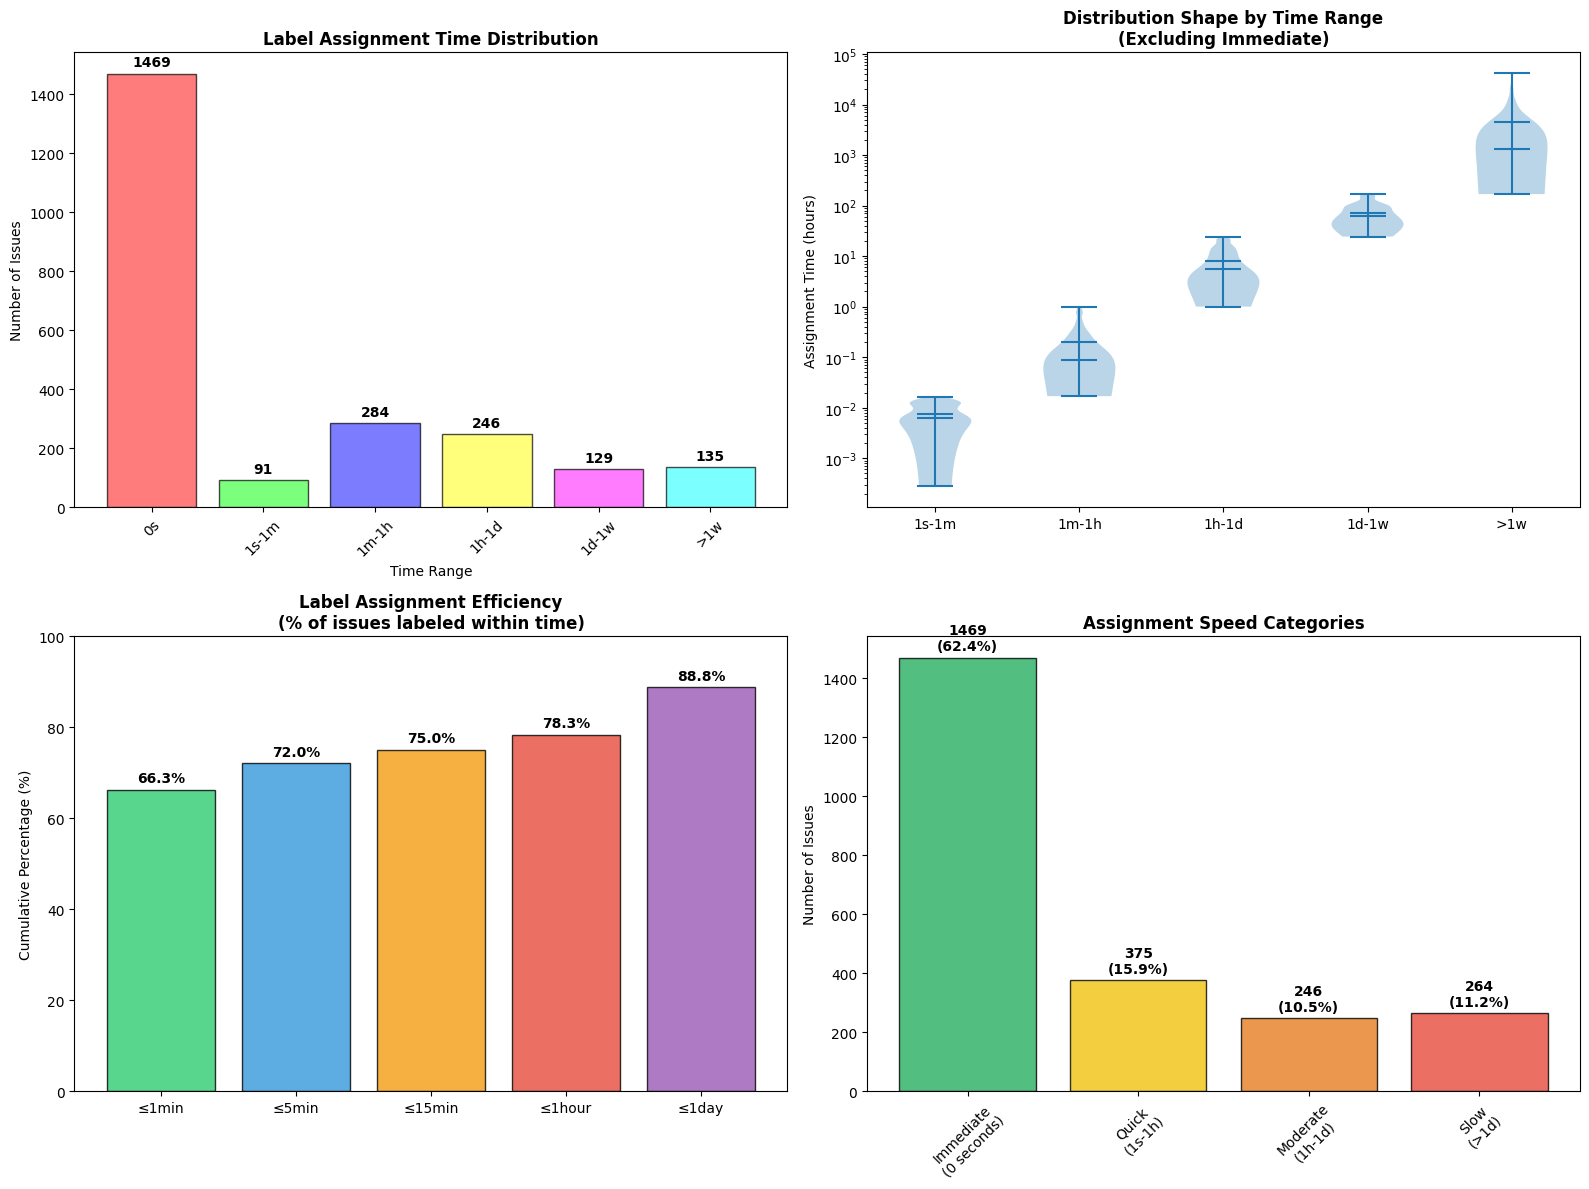


KEY INSIGHTS FROM VISUALIZATIONS
• 62.4% of issues receive area labels immediately
• 78.3% of issues are labeled within 1 hour
• 88.8% of issues are labeled within 1 day
• Median assignment time: 0s
• 95% of issues are labeled within: 13d 23h 9m


In [32]:
# Create additional focused visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Detailed histogram with better binning
ax1 = axes[0, 0]
if len(valid_durations) > 0:
    # Create custom bins for different time ranges
    bins_seconds = [0, 1, 60, 3600, 86400, 604800, valid_durations.max()]
    bin_labels = ['0s', '1s-1m', '1m-1h', '1h-1d', '1d-1w', '>1w']
    
    hist, _ = np.histogram(valid_durations, bins=bins_seconds)
    
    colors = ['#ff4444', '#44ff44', '#4444ff', '#ffff44', '#ff44ff', '#44ffff']
    bars = ax1.bar(range(len(hist)), hist, color=colors, alpha=0.7, edgecolor='black')
    
    ax1.set_xlabel('Time Range')
    ax1.set_ylabel('Number of Issues')
    ax1.set_title('Label Assignment Time Distribution', fontweight='bold')
    ax1.set_xticks(range(len(bin_labels)))
    ax1.set_xticklabels(bin_labels, rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, hist):
        if value > 0:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hist)*0.01,
                    f'{value}', ha='center', va='bottom', fontweight='bold')

# 2. Violin plot for detailed distribution shape
ax2 = axes[0, 1]
if len(valid_durations) > 0:
    # Prepare data for violin plot (exclude immediate for better visualization)
    delayed_only = valid_durations[valid_durations > 0]
    if len(delayed_only) > 0:
        # Create categories
        categories = []
        data_for_violin = []
        
        for i, (lower, upper, label) in enumerate([
            (0, 60, '1s-1m'),
            (60, 3600, '1m-1h'), 
            (3600, 86400, '1h-1d'),
            (86400, 604800, '1d-1w'),
            (604800, float('inf'), '>1w')
        ]):
            category_data = delayed_only[(delayed_only > lower) & (delayed_only <= upper)]
            if len(category_data) > 0:
                categories.append(label)
                # Convert to hours for better readability
                data_for_violin.append(category_data / 3600)
        
        if len(data_for_violin) > 0:
            parts = ax2.violinplot(data_for_violin, positions=range(len(categories)), 
                                  showmeans=True, showmedians=True)
            ax2.set_xticks(range(len(categories)))
            ax2.set_xticklabels(categories)
            ax2.set_ylabel('Assignment Time (hours)')
            ax2.set_title('Distribution Shape by Time Range\n(Excluding Immediate)', fontweight='bold')
            ax2.set_yscale('log')

# 3. Response time efficiency metrics
ax3 = axes[1, 0]
if len(valid_durations) > 0:
    # Calculate efficiency metrics
    efficiency_thresholds = [60, 300, 900, 3600, 86400]  # 1min, 5min, 15min, 1hour, 1day
    efficiency_labels = ['≤1min', '≤5min', '≤15min', '≤1hour', '≤1day']
    
    cumulative_percentages = []
    for threshold in efficiency_thresholds:
        percentage = (valid_durations <= threshold).mean() * 100
        cumulative_percentages.append(percentage)
    
    bars = ax3.bar(efficiency_labels, cumulative_percentages, 
                   color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#9b59b6'], 
                   alpha=0.8, edgecolor='black')
    
    ax3.set_ylabel('Cumulative Percentage (%)')
    ax3.set_title('Label Assignment Efficiency\n(% of issues labeled within time)', fontweight='bold')
    ax3.set_ylim(0, 100)
    
    # Add percentage labels on bars
    for bar, percentage in zip(bars, cumulative_percentages):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Comparison of immediate vs delayed assignments
ax4 = axes[1, 1]
if len(valid_durations) > 0:
    immediate_count = (valid_durations == 0).sum()
    delayed_count = (valid_durations > 0).sum()
    
    # Create a more detailed breakdown
    categories = ['Immediate\n(0 seconds)', 'Quick\n(1s-1h)', 'Moderate\n(1h-1d)', 'Slow\n(>1d)']
    counts = [
        immediate_count,
        ((valid_durations > 0) & (valid_durations <= 3600)).sum(),
        ((valid_durations > 3600) & (valid_durations <= 86400)).sum(),
        (valid_durations > 86400).sum()
    ]
    
    colors = ['#27ae60', '#f1c40f', '#e67e22', '#e74c3c']
    bars = ax4.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
    
    ax4.set_ylabel('Number of Issues')
    ax4.set_title('Assignment Speed Categories', fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    
    # Add count and percentage labels
    total = len(valid_durations)
    for bar, count in zip(bars, counts):
        percentage = count / total * 100
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print key insights
print("\n" + "="*60)
print("KEY INSIGHTS FROM VISUALIZATIONS")
print("="*60)

if len(valid_durations) > 0:
    immediate_pct = (valid_durations == 0).mean() * 100
    within_1h_pct = (valid_durations <= 3600).mean() * 100
    within_1d_pct = (valid_durations <= 86400).mean() * 100
    
    print(f"• {immediate_pct:.1f}% of issues receive area labels immediately")
    print(f"• {within_1h_pct:.1f}% of issues are labeled within 1 hour")
    print(f"• {within_1d_pct:.1f}% of issues are labeled within 1 day")
    print(f"• Median assignment time: {format_duration(pd.Timedelta(seconds=valid_durations.median()))}")
    print(f"• 95% of issues are labeled within: {format_duration(pd.Timedelta(seconds=valid_durations.quantile(0.95)))}")
